# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

## Getting Started

In this project, I am going to analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

The code block below is to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. 

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)) 
except:
    print("Dataset could not be loaded. Is the dataset missing?")
   


Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, I am exploring the data through visualizations and code to understand how each feature is related to the others. Then consider the relevance of each feature, and select a few sample data points from the dataset which will be tracked through the course of this project.

In [3]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7057,9810,9568,1762,3293,1776
1,6353,8808,7684,2405,3516,7844
2,10253,1114,3821,397,964,412


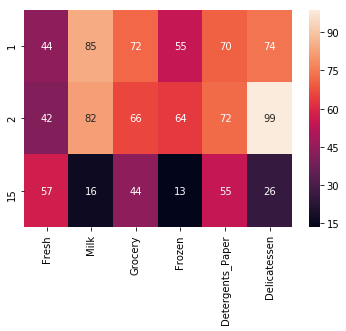

In [4]:
# Select three indices of your choice you wish to sample from the dataset
indices = [1,2,15]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

import seaborn as sns
percentiles_data=100*data.rank(pct=True)
percentiles_samples=percentiles_data.iloc[indices]
sns.heatmap(percentiles_samples,annot=True)

Consider the total purchase cost of each product category and the statistical description above, we can get the kind of customer of the three samples based on comparison with the mean values. 

The mean values for reference to compare your samples with. The mean values are as follows:
* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

*Customer #1 purchases much higher on Milk, Grocery, Detergents_Paper and Delicatessen. So this could be a cafes. 
*Customer #2 purchases much higher on milk, paper and  significantlly high on Delicatessen. Therefore, this is a delis. 
Customer #15 purchases more than median on Fresh and Paper, indicated it could be a market. 


### Feature Relevance

Is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, these steps are implemented:
 - Assign `new_data` a copy of the data by removing a feature using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as the target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
# Make a copy of the DataFrame, using the 'drop' function to drop the given feature

new_data = data
X=new_data.drop(['Fresh'],axis=1)
y=new_data.Fresh

# Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=1)

# Create a decision tree regressor and fit it to the training set

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=1)
regressor.fit(X_train,y_train)

# Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)
print("Decision Tree Regressor predict score is: %.2f" %score)

Decision Tree Regressor predict score is: -0.92


I attempt to predict Fresh feature. The reported prediction score is -0.92, which implies the model fails to fit the data. This lends us to believe Fresh feature is hard to predict using the other features. Therefore, Fresh need to be an important feature when considering relevance.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/Users/wkw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


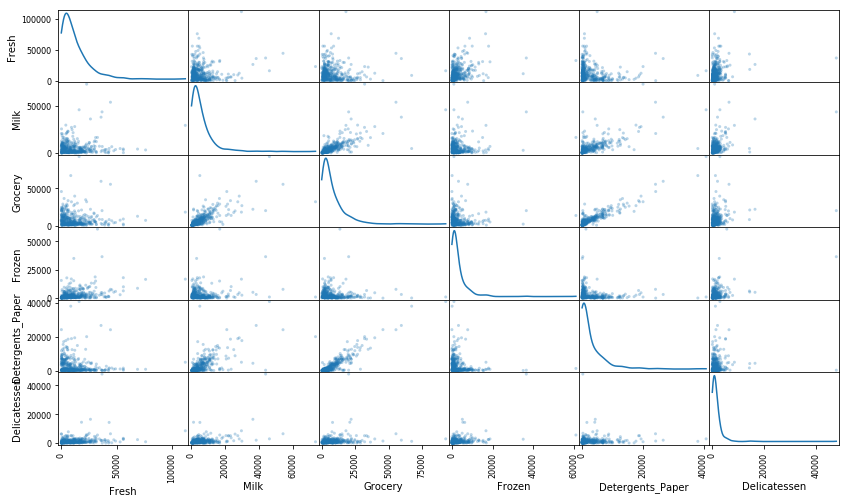

In [9]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

/Users/wkw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


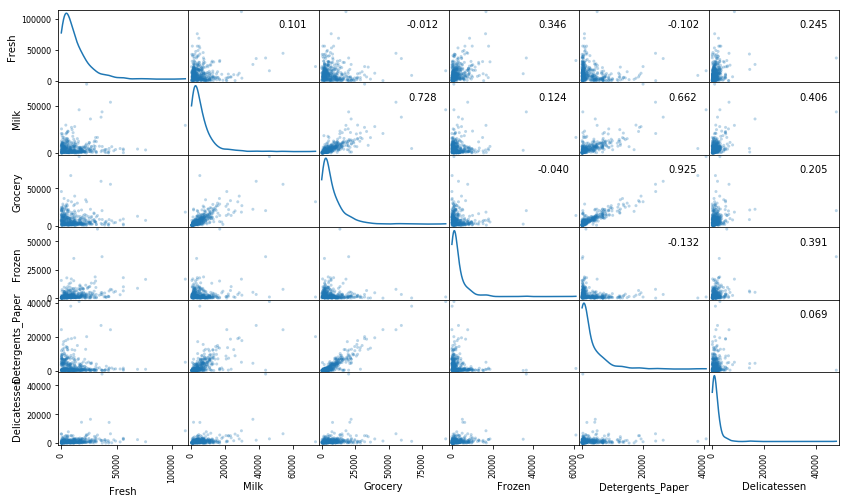

In [10]:
axes=pd.scatter_matrix(data,alpha=0.3,figsize=(14,8),diagonal='kde')
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

In [11]:
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


The data is not normally distributed. 
The marginal distribution plots along the diagonal of the scatter_matrix indicate that the dataset is highely right skewed. 
From the distribution of the dataset, Grocery and Detergents Paper, Milk and Grocery, Milk and Detergents Paper show a strong liner correlation. The scatter plot of Fresh row does not show any correlation with other features, which means it is relavent for identifying customer. This agrees with my predictions that Fresh is necessary to predict customer's spending habit. 

**Useful link**: https://en.wikipedia.org/wiki/Skewness

## Data Preprocessing
Preprocessing data is often times a critical step in assuring that results obtained from the analysis are significant and meaningful. In this section, data will be preprocessed to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. 

### Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, these steps are implemented as following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

/Users/wkw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


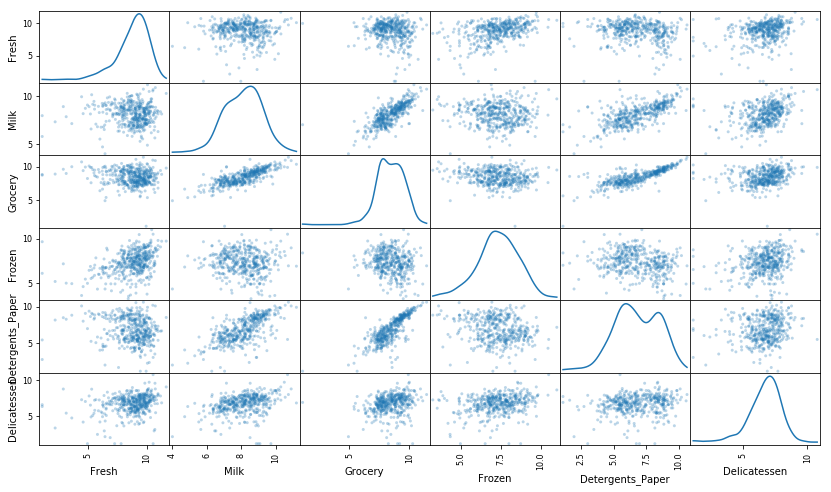

In [12]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).


In [13]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
1,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
2,9.235326,7.015712,8.248267,5.983936,6.871091,6.021023


### Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, these steps are implemented as following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.


In [14]:
# For each feature find the data points with extreme high or low values
outliers=[]

for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature)) 
    outliers_df = log_data[~((log_data[feature]>=Q1-step)&(log_data[feature]<=Q3+step))]
    display(outliers_df)

    for index in outliers_df.index.values:
        outliers.append(index)
print("All outliers are:\n", outliers)

from collections import Counter
outliers_mult = [item for item, count in Counter(outliers).items() if count > 1]    
outliers=outliers_mult
print("\nOverlapped outliers are:\n",outliers)

good_data = log_data.drop(log_data.index[list(outliers)]).reset_index(drop = True)


Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


All outliers are:
 [65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 154, 38, 57, 65, 145, 175, 264, 325, 420, 429, 439, 75, 161, 66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]

Overlapped outliers are:
 [65, 66, 128, 154, 75]


In [42]:
df = pd.DataFrame(index=[10,100])
df.index.values

array([ 10, 100])

Data points 65, 66, 128, 154, 75 considered outliers show up in more than one feature. These data points considered as outliers on multi-features should be removed from the dataset. Here are reasons. If a datapoint is an outlier in one feature, then we could argue that might be a real purchase. But if a datapoint is an outlier on many features, then perhaps a data entry erro is made and we are less reluctant to keep it. Furture more, multi-features outliers have higher influence in our analysis. Other than removal outliers, we also need to consider that data collection is cost consuming and we should use as much as possible we can. Therefore, I only removed a small subset which is the overlapped outliers from multi-feature other than all of them for limited data resource. 

## Feature Transformation
In this section,  principal component analysis (PCA) is used to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

**Useful link**: PCA learning https://onlinecourses.science.psu.edu/stat505/node/54

In the code block below, these steps are implemented as following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


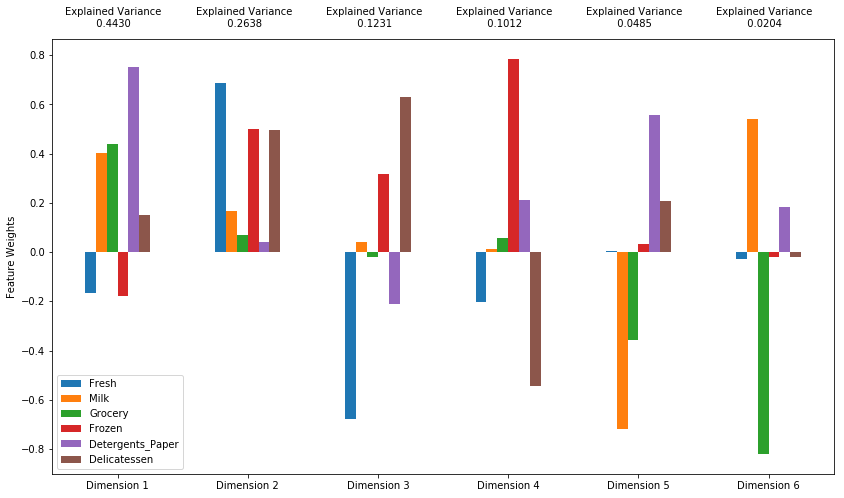

In [16]:
# Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples=pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)
print(pca_results["Explained Variance"].cumsum())

The dimension listed in the above figure means the same as principal component. The total variance explained by the first and second pc is 0.7068. The first four pcs explained 0.9311 variance. The first principal component is strongly correlated with three variances: Milk, Grocery, and Detergents_paper. If one increases, then the remaining ones tend to as well. Furthermore, we see that the first component correlates most strongly with the Detergents_paper. This could be a cafe customer.  The second component is strongly correlated with Fresh, Frozen, and Delicatessen. This could be a deli customer. The third pc is strongly correlated with positive weighted fresh and negative weighted Frozen, indicating it is a Market. The fourth pc is strong correlated with positive weighted delicatessen and negative weighted Frozen and Detergents_paper.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [17]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.7887,0.8123,0.2315,-0.0036,-0.1194,0.2106
1,1.8834,1.5991,1.3204,-0.5432,0.3934,0.3117
2,-0.4258,-0.8803,-1.2189,-0.7945,0.7319,-0.3868


### Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, these steps are implemented as folloywing:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [18]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [19]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.7887,0.8123
1,1.8834,1.5991
2,-0.4258,-0.8803


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

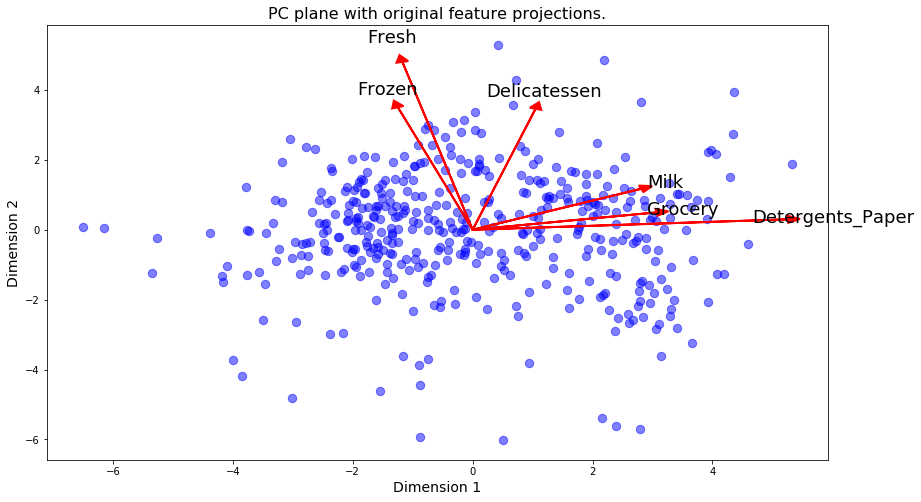

In [20]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, detergents paper, milk, grocery are strongly correlated with the first pc. Frozen, fresh and delicatessen are associated with the second component. These observations agree with the pca_results plot obtained earlier. 

## Clustering

In this section, a K-Means clustering algorithm and a Gaussian Mixture Model clustering algorithm are discussed. 

K-Means advantages:
K-Mean much faster and much more scalable;
K-Means straight boundaries (hard clustering), produces tighter cluster;

K-Means disadvantages:
k-means assumes the variance of the distribution of each attribute (variable) is spherical;
all variables have the same variance;


GMM advantages:
GMM you get much more structural information, thus you can measure how wide each cluster is, since it works on probabilities (soft clustering).


GMM disadvantages:
GMM slower since it has to incorporate information about the distributions of the data, thus it has to deal with the co-variance, mean, variance, and prior probabilities of the data, and also has to assign probabilities to belonging to each clusters.
For computational reasons, GMM can fail to work if the dimensionality of the problem is too high (i.e. greater than 6 dimensions for instance)

In many instances the user will not know how many mixture models should be used and may have to experiment with a number of different mixture models in order to find the most suitable number of models that works for their classification problem. It is a good strategy to go with the faster KMeans for preliminary analysis, and if later the results could be significantly improved, use GMM in the next step while using the cluster assignments and centres obtained from KMeans as the initialisation for GMM.

### Creating Clusters
Depending on the problem, We can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, these are implemented:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
 - Assign the silhouette score to `score` and print the result.

In [35]:
# Apply your clustering algorithm of choice to the reduced data 
# http://scikit-learn.org/0.17/auto_examples/mixture/plot_gmm_classifier.html
# GMM Document
# http://scikit-learn.org/0.17/auto_examples/mixture/plot_gmm_selection.html#example-mixture-plot-gmm-selection-py

# Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=2, random_state=1).fit(reduced_data)
       
# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
# centers = clusterer.fit_predict(reduced_data) does not work
centers = clusterer.cluster_centers_

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# Calculate the mean silhouette coefficient for the number of clusters chosen
# good material to read
# http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn import metrics
score = metrics.silhouette_score(reduced_data, preds)
print("silhouette score for 2 cluster in KNN = %0.2f" %score)

silhouette score for 2 cluster in KNN = 0.43


The sihouette score for 2 cluster is 0.43, 3 cluster is 0.37, 4 cluster is 0.34, 5 cluster is 0.36. The more close to 1 the more similar to the assigned cluster. Of theses, 2 cluster numbers has the best sihouette score which means 2 clusters best describe the clusters data points. 

### Cluster Visualization
Once the optimal number of clusters is chosen, we can run the code cell below to visualize the results.  

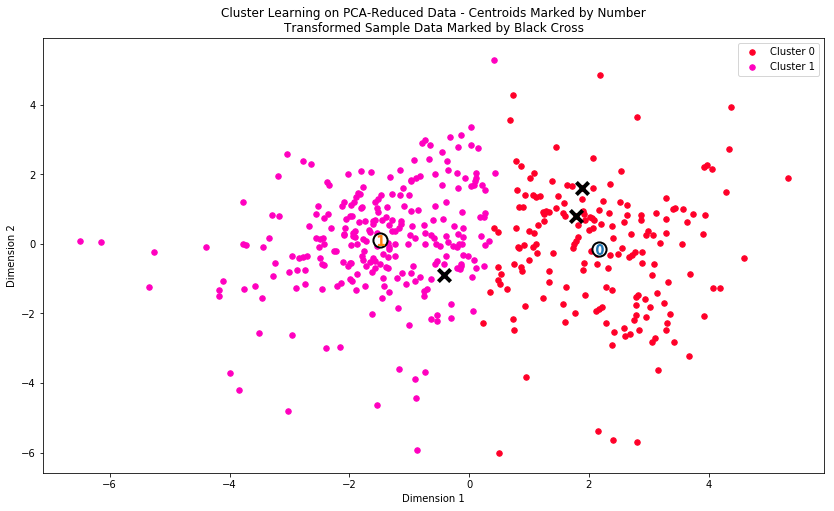

In [40]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, these are implemented:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [41]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4005.0,7900.0,12104.0,952.0,4561.0,1036.0
Segment 1,8867.0,1897.0,2477.0,2088.0,294.0,681.0


Segment 0 has milk, grocery and detergents paper higher than the mean. Therefore, Cluster 0 should be a retailer wise customer. All features in Segment 1 are lower than the mean, however, the Fresh is higher than its medium. Therefore, segement 1 could be a market/restaurant customer.  

Obverseved from the cluster visualization abover, the two points closed to center of Cluster 0 should belong to this cluster. And the one point in pink clustur should belong to Cluster 1. After running the code abover, the prediction are consistant with my guess from the visulization. However, when compare with conjectures made in Q1,  Points 0 and 2 are consistent with predictions. but did not predict point 1 correctly. 

In [42]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred) 

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


## Conclusion

Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?

Segment 0 is a retailer customer, which purchase more on milk, deli and grocery. And these products do not necessary to be fresh. However, segment 1 purchases more on Fresh, requires the products to be as fresh as possible. Therefore, changing to less frenquency delivery service is probably risky. So the wholesale should run the A/B test on Segment 0 first. The segment 0 customers can be randomized splitted into two similar group. Then one group delievery 5 days a week, while the other group delivery 3 days a week. Based on the comparable reacts from the two groups, the distributor will know if the change is positive or negative. 

**Useful link**: 
https://www.quora.com/When-should-A-B-testing-not-be-trusted-to-make-decisions/answer/Edwin-Chen-1
http://techblog.netflix.com/2016/04/its-all-about-testing-netflix.html
https://vwo.com/ab-testing/
http://stats.stackexchange.com/questions/192752/clustering-and-a-b-testing